## **Práctica 14: Árboles de decisión y Bosques aleatorios (Diabetes)**

Nombre:

No. Cuenta:

Email:

### **Caso de estudio**

Estudios clínicos de diabetes en una población femenina.

**Objetivo.** Clasificar si una persona tiene diabetes o no, en función de otros parámetros disponibles, como número de embarazos, glucosa, presión arterial, índice de masa corporal, los niveles de insulina, entre otros. Este es un problema de clasificación y se requiere obtener el mejor modelo de aprendizaje automático para predecir la diabetes.

**Emplear los algoritmos:** 

* Árbol de decisión.
* Bosque aleatorio.

**Fuente de datos:**

https://www.kaggle.com/saurabh00007/diabetescsv

**Variables:**

* Número de embarazos (Pregnancies): número de veces que ha estado embarazada la persona.

* Concentración de glucosa en plasma (Glucose): cantidad de glucosa en la sangre. Cuando una persona ha ingerido alimento los valores normales son menores a 140 mg/DL y cuando los resultados se dan entre 140 a 190 son indicativos de diabetes.

* Presión arterial diastólica (BloodPressure): es la cantidad de presión que hay en las arterias ente un latido y otro.

* Espesor del pliegue cutáneo (SkinThickness): es un procedimiento frecuentemente utilizado, en combinación con el índice de masa corporal (IMC), para estimar la grasa corporal. Medir los pliegues cutáneos permite valorar los depósitos de grasa del cuerpo humano. A modo de referencia, según la medicina el espesor normal: ♂ 12 mm; ♀ 23 mm.

* Insulina (Insulin): es una prueba de insulina que consiste analizar antes de administrar la glucosa y 2 horas después. La razón por la que se realizan estas pruebas es para ver la curva de respuesta a la glucosa.

* Índice de masa corporal (BMI): es utilizado para estimar la cantidad de grasa corporal, y determinar si el peso está dentro del rango normal, o por el contrario, se tiene sobrepeso o delgadez.

* Función pedigrí de la diabetes (DiabetesPedigreeFunction): es una función que califica la probabilidad de diabetes según los antecedentes familiares.

* Edad en años (Age).

* Resultado (Outcome): si es positivo o negativo al diagnóstico de diabetes.

### **I. Acceso a datos y selección de características**

#### **1) Acceso a los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [2]:
Diabetes = pd.read_csv('Datos/Diabetes.csv')
Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print(Diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


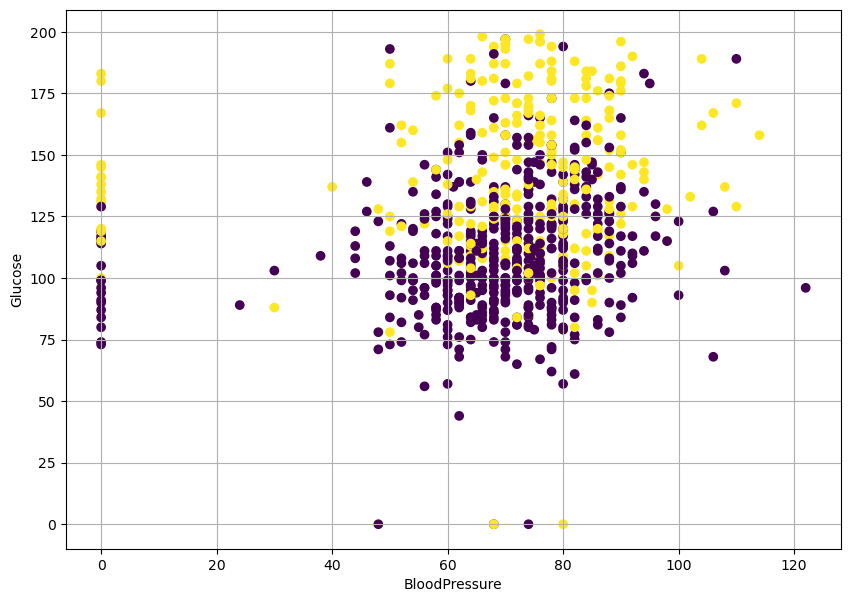

In [5]:
plt.figure(figsize=(10, 7))
plt.scatter(Diabetes['BloodPressure'], Diabetes['Glucose'], c = Diabetes.Outcome)
plt.grid()
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.show()

In [6]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### **2) Selección de características**

A través de un mapa de calor de identifican posibles variables correlacionadas.

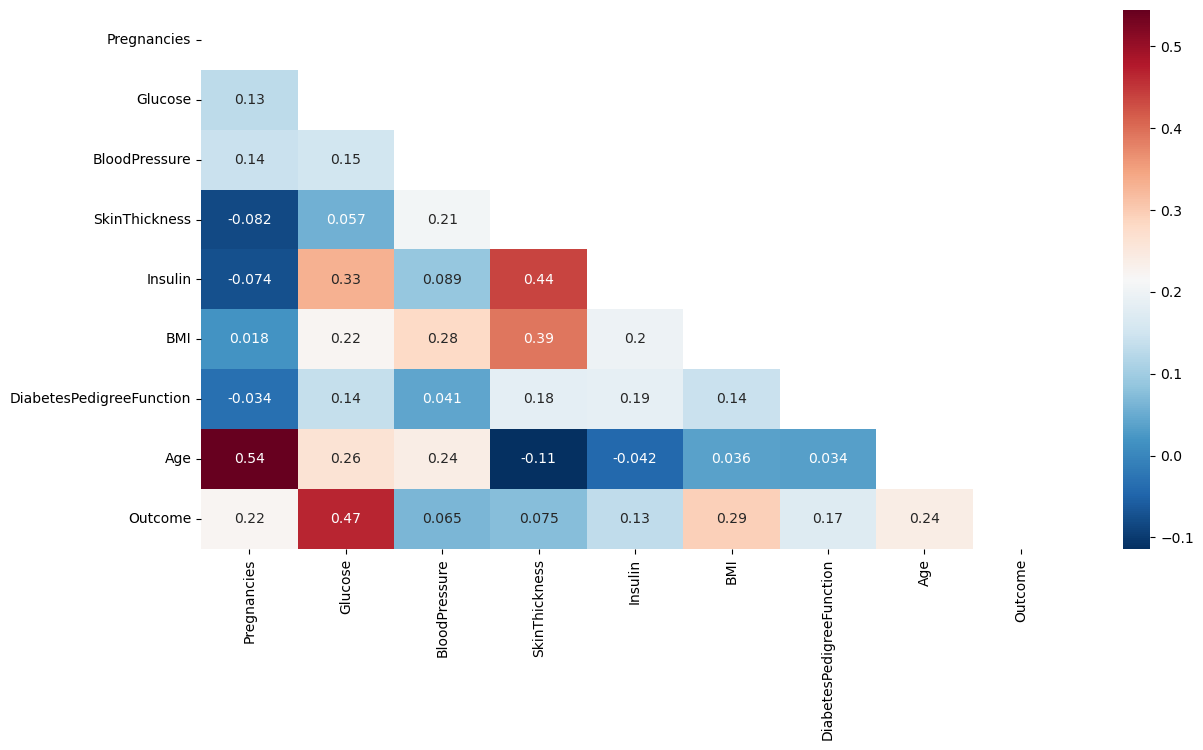

In [7]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(Diabetes.corr())
sns.heatmap(Diabetes.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Varibles seleccionadas:**

Ante la no presencia de correlaciones altas (fuertes), se consideran a todas las variables para la construcción de los modelos.

#### **3) Definición de las variables predictoras y variable clase**


In [8]:
#Variables predictoras
X = np.array(Diabetes[['Pregnancies', 
                       'Glucose', 
                       'BloodPressure', 
                       'SkinThickness', 
                       'Insulin', 
                       'BMI',
                       'DiabetesPedigreeFunction',
                       'Age']])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [9]:
#Variable clase
Y = np.array(Diabetes[['Outcome']])
pd.DataFrame(Y)

,0
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


### **II. Creación de los modelos**

In [10]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [11]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0,
                                                                                shuffle = True)

In [12]:
print(len(X_train))
print(len(X_validation))

614
154


In [37]:
Y_validation.ravel()

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [38]:
Y_validation

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

### **Modelo 1: Árboles de decisión (AD)**

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
#Se entrena el modelo a partir de los datos de entrada
#ClasificacionAD = DecisionTreeClassifier(random_state=0)
#ClasificacionAD.fit(X_train, Y_train)

ClasificacionAD = DecisionTreeClassifier(max_depth=14, 
                                         min_samples_split=4, 
                                         min_samples_leaf=2,
                                         random_state=0)
ClasificacionAD.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [15]:
#Clasificación final 
Y_ClasificacionAD = ClasificacionAD.predict(X_validation)
print(Y_ClasificacionAD)

[1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]


In [16]:
ValoresMod1 = pd.DataFrame(Y_validation, Y_ClasificacionAD)
ValoresMod1

,0
1,1
0,0
0,0
1,1
0,0
...,...
0,1
0,0
0,1
0,0


In [17]:
accuracy_score(Y_validation, Y_ClasificacionAD)

0.7922077922077922

#### **Matriz de clasificación: Árbol de decisión**

In [18]:
#Matriz de clasificación
ModeloClasificacion1 = ClasificacionAD.predict(X_validation)
Matriz_Clasificacion1 = pd.crosstab(Y_validation.ravel(), 
                                   ModeloClasificacion1, 
                                   rownames=['Reales'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion1

Clasificación,0,1
Reales,,
0,90,17
1,15,32


In [35]:
Matriz_Clasificacion1.columns

Int64Index([0, 1], dtype='int64', name='Clasificación')

In [19]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionAD.criterion)
print('Importancia variables: \n', ClasificacionAD.feature_importances_)
print("Exactitud:", accuracy_score(Y_validation, Y_ClasificacionAD))
print(classification_report(Y_validation, Y_ClasificacionAD))

Criterio: 
 gini
Importancia variables: 
 [0.0515404  0.34226038 0.10027699 0.02862138 0.03282443 0.18465592
 0.12604613 0.13377435]
Exactitud: 0.7922077922077922
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       107
           1       0.65      0.68      0.67        47

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154



#### **Eficiencia y conformación del modelo de clasificación**

* En la matriz de confusión se utilizó 154 instancias de prueba, clasificándose de manera errónea 32 casos. Esto hace que el modelo tenga un 79.22% de exactitud y un 65% de precisión para los casos positivos y 86% para los casos negativos. 

* Por otro lado, el error promedio es de 21%.

In [20]:
ImportanciaMod1 = pd.DataFrame({'Variable': list(Diabetes[['Pregnancies',
                                                           'Glucose',
                                                           'BloodPressure',
                                                           'SkinThickness',
                                                           'Insulin',
                                                           'BMI',
                                                           'DiabetesPedigreeFunction',
                                                           'Age']]),
                                'Importancia': ClasificacionAD.feature_importances_}).sort_values('Importancia', ascending=False)
ImportanciaMod1

,Variable,Importancia
1,Glucose,0.342260
5,BMI,0.184656
7,Age,0.133774
6,DiabetesPedigreeFunction,0.126046
2,BloodPressure,0.100277
0,Pregnancies,0.051540
4,Insulin,0.032824
3,SkinThickness,0.028621


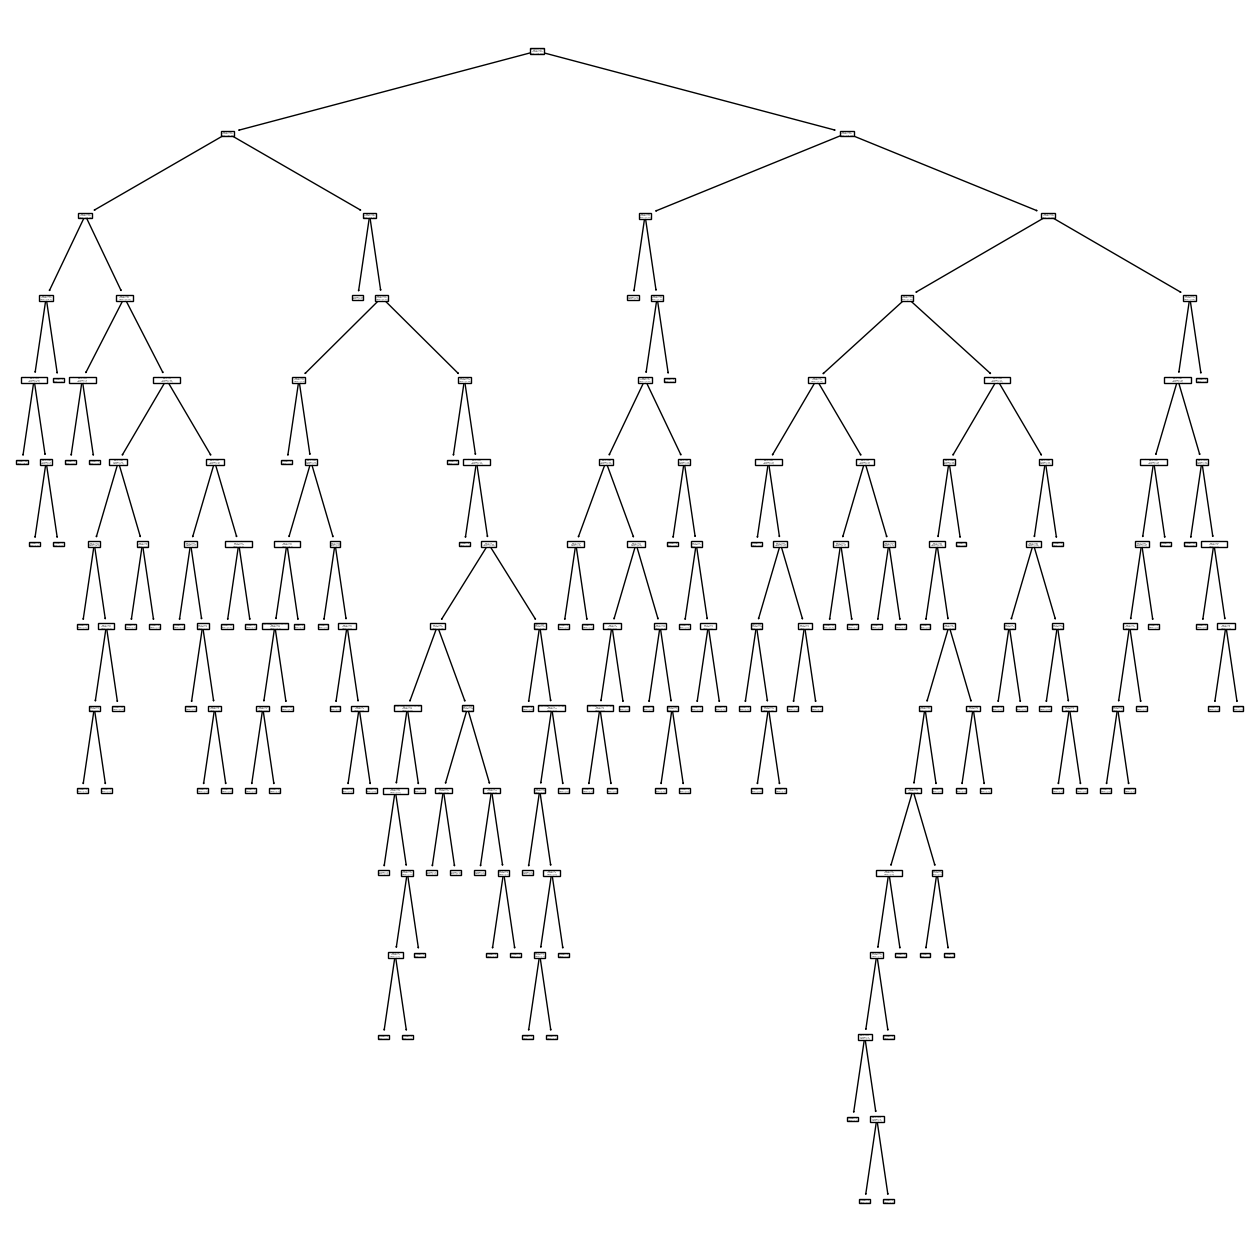

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(ClasificacionAD, feature_names = ['Pregnancies', 
                                            'Glucose', 
                                            'BloodPressure', 
                                            'SkinThickness', 
                                            'Insulin', 
                                            'BMI', 
                                            'DiabetesPedigreeFunction',
                                            'Age'])
plt.show()

In [22]:
from sklearn.tree import export_text
Reporte = export_text(ClasificacionAD, feature_names = ['Pregnancies', 
                                                        'Glucose', 
                                                        'BloodPressure', 
                                                        'SkinThickness', 
                                                        'Insulin', 
                                                        'BMI', 
                                                        'DiabetesPedigreeFunction',
                                                        'Age'])
print(Reporte)

|--- Glucose <= 123.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- Glucose <= 119.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |   |--- Insulin <= 53.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Insulin >  53.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  119.00
|   |   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- BloodPressure <= 53.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.51
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.51
|   |   |   |   |   |--- class: 0
|   |   |   |--- BloodPressure >  53.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- BloodPressure <= 83.50
|   |   |   |   |   |   |--- BMI <= 31.80
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- BMI >  31.80
|   |   |   |   |

### **Modelo 2: Bosques aleatorios (BA)**

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
#ClasificacionBA = RandomForestClassifier(random_state=0)
#ClasificacionBA.fit(X_train, Y_train)

ClasificacionBA = RandomForestClassifier(n_estimators=105,
                                         max_depth=7, 
                                         min_samples_split=4, 
                                         min_samples_leaf=2, 
                                         random_state=1234)
ClasificacionBA.fit(X_train, Y_train)

/var/folders/3q/9ndt9tvs4t3csrp6qxw_08c40000gn/T/ipykernel_1672/1268730472.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ClasificacionBA.fit(X_train, Y_train)


RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=105, random_state=1234)

In [25]:
#Clasificación final 
Y_ClasificacionBA = ClasificacionBA.predict(X_validation)
print(Y_ClasificacionBA)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]


In [26]:
ValoresMod2 = pd.DataFrame(Y_validation, Y_ClasificacionBA)
ValoresMod2

,0
1,1
0,0
0,0
1,1
0,0
...,...
0,1
0,0
0,1
0,0


In [27]:
accuracy_score(Y_validation, Y_ClasificacionBA)

0.8376623376623377

#### **Matriz de clasificación: Bosques aleatorios**

In [28]:
#Matriz de clasificación
ModeloClasificacion2 = ClasificacionBA.predict(X_validation)
Matriz_Clasificacion2 = pd.crosstab(Y_validation.ravel(),
                                    ModeloClasificacion2,
                                    rownames=['Reales'],
                                    colnames=['Clasificación']) 
Matriz_Clasificacion2

Clasificación,0,1
Reales,,
0,98,9
1,16,31


In [29]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionBA.criterion)
print('Importancia variables: \n', ClasificacionBA.feature_importances_)
print("Exactitud:", accuracy_score(Y_validation, Y_ClasificacionBA))
print(classification_report(Y_validation, Y_ClasificacionBA))

Criterio: 
 gini
Importancia variables: 
 [0.06320334 0.28561869 0.06759137 0.05851346 0.07016391 0.18520849
 0.1110467  0.15865405]
Exactitud: 0.8376623376623377
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       107
           1       0.78      0.66      0.71        47

    accuracy                           0.84       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.83      0.84      0.83       154



#### **Eficiencia y conformación del modelo de clasificación**

* Se clasificaron de manera errónea 25 casos. Esto hace que el modelo tenga un 83.76% de exactitud y un 78% de precisión para los casos positivos y 86% para los casos negativos. 

* Por otro lado, el error promedio es de 17%.

In [30]:
Importancia2 = pd.DataFrame({'Variable': list(Diabetes[['Pregnancies',
                                                        'Glucose',
                                                        'BloodPressure', 
                                                        'SkinThickness', 
                                                        'Insulin', 
                                                        'BMI',
                                                        'DiabetesPedigreeFunction',
                                                        'Age']]), 
                             'Importancia': ClasificacionBA.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia2

,Variable,Importancia
1,Glucose,0.285619
5,BMI,0.185208
7,Age,0.158654
6,DiabetesPedigreeFunction,0.111047
4,Insulin,0.070164
2,BloodPressure,0.067591
0,Pregnancies,0.063203
3,SkinThickness,0.058513


### **III. Validación (rendimiento)**


In [31]:
print("Árbol de decisión:", accuracy_score(Y_validation, Y_ClasificacionAD))
print("Bosque aleatorio:", accuracy_score(Y_validation, Y_ClasificacionBA))

Árbol de decisión: 0.7922077922077922
Bosque aleatorio: 0.8376623376623377


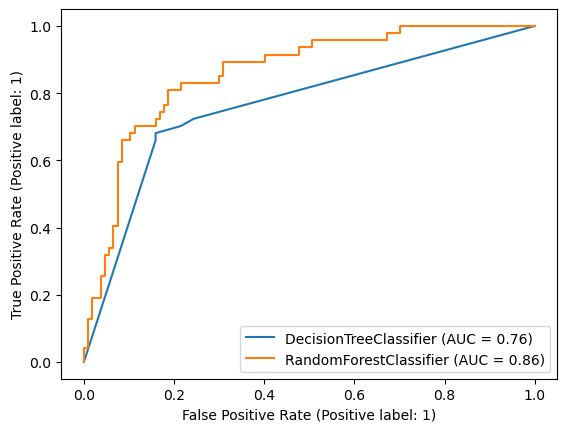

In [32]:
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(ClasificacionAD,
                               X_validation,
                               Y_validation,
                               ax = ax)
metrics.RocCurveDisplay.from_estimator(ClasificacionBA,
                                         X_validation,
                                         Y_validation,
                                         ax = ax)
plt.show()

### **IV. Nuevas clasificaciones**


In [33]:
#Paciente
PacienteAD = pd.DataFrame({'Pregnancies': [6],
                           'Glucose': [148],
                           'BloodPressure': [72],
                           'SkinThickness': [35],
                           'Insulin': [0],
                           'BMI': [33.6],
                           'DiabetesPedigreeFunction': [0.627],
                           'Age': [50]})
ClasificacionAD.predict(PacienteAD)

/Users/hugomeza/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1])

In [34]:
#Paciente
PacienteBA = pd.DataFrame({'Pregnancies': [6],
                           'Glucose': [148],
                           'BloodPressure': [72],
                           'SkinThickness': [35],
                           'Insulin': [0],
                           'BMI': [33.6],
                           'DiabetesPedigreeFunction': [0.627],
                           'Age': [50]})
ClasificacionBA.predict(PacienteBA)

/Users/hugomeza/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1])